In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np

from dataset import get_dataset, pick_train_set, show_some_data
from utils import get_config
from model import get_model

In [2]:
train_data, test_data = get_dataset(dataset_name='mnist', data_config=None, batch_size=32)

train: 60000, test: 10000


In [3]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/mnist
    Split: Train
    StandardTransform
Transform: ToTensor()

## Filtering MNIST classes

In [3]:
training_data = datasets.MNIST(
    root='data/mnist',
    train=True,
    download=True,
    transform=ToTensor()
)
test_data = datasets.MNIST(
    root='data/mnist',
    train=False,
    download=True,
    transform=ToTensor()
)

Text(0.5, 1.0, '5')

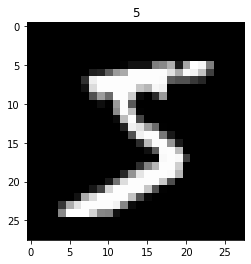

In [18]:
# plot data points
img, label = training_data[0]
img = img.squeeze()

plt.imshow(img, cmap='gray')
plt.title(label)

In [22]:
def filter_classes(data, num_classes = 2):
    filtered_data = []
    for img, label in data:
        for cls in range(num_classes):
            if cls == label:
                img = img.squeeze()
                filtered_data.append([img, label])
    return filtered_data
        

In [25]:
filtered_data = filter_classes(training_data, num_classes=2)

len(filtered_data)

12665

In [27]:
f_dataloader = DataLoader(filtered_data, batch_size=32, shuffle=False)

In [35]:
for point in f_dataloader:
    print(point[0])
    print('this is 1', point[1], len(point[1]))
    break

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

## Picking S and picking testing set

In [3]:
config = get_config()
data_dist = get_dataset(config.data)

In [44]:
def pick_train_set(data_dist, train_size, random_seed = 1234, replace=True):
    if train_size > len(data_dist):
        raise Exception('Train size too large')
    rnp = np.random.RandomState(random_seed)
    picked_index = rnp.choice(range(len(data_dist)), train_size, replace=replace)
    train_set = list(map(lambda i: data_dist[i], picked_index))
    return train_set

### Plotting and verifying random labels

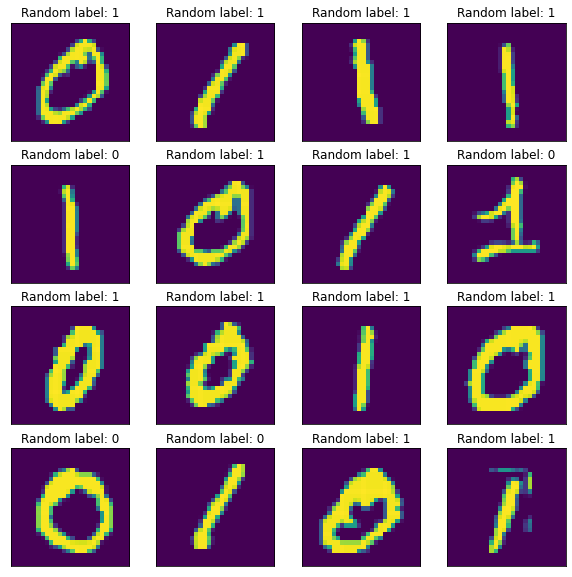

In [4]:
# train_set = pick_train_set(data_dist=data_dist, train_size=5, random_seed=2)
len(data_dist)
show_some_data(data_dist)


In [36]:
np.random.randint(0,2)

0

## Testing Random Model initialization 

In [13]:
torch.manual_seed(123)

model = get_model('fnn', 728, 2, [16])
# model
for param in model.parameters():
    print(param)
    print('**'*30)
    break

model = get_model('fnn', 728, 2, [16])
# model
for param in model.parameters():
    print(param)
    print('**'*30)
    break

print(torch.randint(10, (5,)))
print(torch.randint(10, (5,)))

Parameter containing:
tensor([[-0.0151,  0.0012, -0.0184,  ..., -0.0048, -0.0245, -0.0170],
        [-0.0242, -0.0240,  0.0290,  ..., -0.0203,  0.0125,  0.0298],
        [-0.0116,  0.0354,  0.0308,  ...,  0.0003,  0.0115,  0.0015],
        ...,
        [ 0.0133, -0.0347, -0.0159,  ..., -0.0060, -0.0013,  0.0244],
        [-0.0134,  0.0182,  0.0047,  ...,  0.0368,  0.0301,  0.0039],
        [ 0.0125,  0.0130,  0.0251,  ..., -0.0198, -0.0346, -0.0114]],
       requires_grad=True)
************************************************************
Parameter containing:
tensor([[ 9.3357e-04, -3.2902e-02,  4.2483e-03,  ...,  1.2263e-02,
         -1.9506e-02, -2.7708e-03],
        [ 6.6479e-03, -3.5253e-02, -1.0963e-02,  ...,  1.8311e-02,
         -2.1221e-02, -3.2583e-02],
        [ 2.0426e-02, -5.7022e-03, -1.8767e-02,  ..., -2.5181e-02,
         -1.1223e-02,  3.6773e-03],
        ...,
        [ 1.0303e-02, -4.5225e-05,  2.7461e-02,  ..., -2.7059e-02,
          6.1557e-03, -1.6632e-02],
        [

## Checking format for string

In [29]:
var = 6.3423
print(f'this is {var:<30.3f}, this is next')
print('start')

this is 6.342                         , this is next
start


## Testing Custom Loss function

In [117]:
class StepLoss(torch.nn.Module):
    def __init__(self, device) -> None:
        super(StepLoss, self).__init__()

        self.weight = 6
        self.device = device
    
    def forward(self, op, target):
        B = op.shape[0]
        op = op * self.weight
        # for numerical stability
        op = op - op.max(dim = 1, keepdim=True).values
        # print('new op:', op)
        op_exp = torch.exp(op)
        op_exp_sum = torch.sum(op_exp, dim=1, keepdim=True)
        sm_output = 1. - op_exp/op_exp_sum
        # print('probs:', sm_output)
        loss = torch.tensor([0.]).to(self.device)
        for i in range(B):
            temp_loss = sm_output[i][target[i].item()]
            print(f'loss{i}: {temp_loss}')
            loss += temp_loss
        loss = loss/B
        return loss
    
class ImpulseLoss(torch.nn.Module):
    def __init__(self, weight = 15.0) -> None:
        super(ImpulseLoss, self).__init__()

        self.weight = weight
    
    def forward(self, op, label):
        if len(op.shape) > 1 or len(label.shape)>1:
            raise Exception('Output and label should be 1D tensor')
        y = 1/(1 - torch.exp(-self.weight*op))
        loss = label*y 



In [118]:
loss_fn = StepLoss('cpu')

In [6]:
for i in range(100):
    loss_fn.weight = i*2
    loss = loss_fn(torch.tensor([3,4]), torch.tensor(0))
    print(f'loss: {loss}')

loss: 0.5
loss: 0.11920292675495148
loss: 0.01798621006309986
loss: 0.0024726230185478926
loss: 0.00033535013790242374
loss: 4.539786823443137e-05
loss: 6.14417513133958e-06
loss: 8.315280410897685e-07
loss: 1.1253516163378663e-07
loss: 1.5229979055675358e-08
loss: 2.06115369216775e-09
loss: 2.789468100949932e-10
loss: 0.0
loss: 0.0
loss: 0.0
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss:

In [119]:
torch.manual_seed(1)
loss_fn.weight = 6
x = torch.tensor([3.,4.], requires_grad=True)
x = torch.rand((4,2))
label = torch.zeros(4, dtype=torch.long)
print('x:',x)
print('label:',label)
# loss_fn.weight= 5
loss = loss_fn(x, label)
loss

x: tensor([[0.7576, 0.2793],
        [0.4031, 0.7347],
        [0.0293, 0.7999],
        [0.3971, 0.7544]])
label: tensor([0, 0, 0, 0])
loss0: 0.05366051197052002
loss1: 0.8797104954719543
loss2: 0.9902767539024353
loss3: 0.8950511813163757


tensor([0.7047])

In [29]:
loss.backward()     

In [30]:
x.grad

tensor([ 0.0332, -0.0332])

In [51]:
torch.manual_seed(1)
t1 = torch.rand((4,2))
t2 = torch.tensor([0,1,1,0])
print(t1)
print(t2)

print(t2.tolist())
t1[(0,1), (1,0)]

tensor([[0.7576, 0.2793],
        [0.4031, 0.7347],
        [0.0293, 0.7999],
        [0.3971, 0.7544]])
tensor([0, 1, 1, 0])
[0, 1, 1, 0]


IndexError: too many indices for tensor of dimension 2

In [86]:
t1 - t1.max(dim = 1).values.unsqueeze(dim = 1)

tensor([[ 0.0000, -0.4783],
        [-0.3316,  0.0000],
        [-0.7706,  0.0000],
        [-0.3572,  0.0000]])